In [85]:
import pandas as pd

df1 = pd.read_csv('回归/1_New_open_tm_regression_df_raw.csv')
df2 = pd.read_csv('回归/1_New_open_jd_regression_df_raw.csv')

merged_df = pd.merge(df1, df2, on=['store_id', '出货_month_number','overlap01'], suffixes=['_tm', '_jd'],how='outer')
merged_df['订购金额'] = merged_df['订购金额_tm'] + merged_df['订购金额_jd']

In [87]:
# 创建布尔索引
mask = merged_df['订购金额'].isna()

merged_df.loc[mask, '订购金额'] = merged_df.loc[mask, ['订购金额_tm', '订购金额_jd']].sum(axis=1, min_count=1)

print(merged_df['订购金额'])

merged_df.to_csv('1_jd_tmall_raw.csv')
#然后需要填一下open和coverage，jd=Tmall的值

0      10689.56
1       7704.59
2      11824.79
3       1571.20
4       7707.23
         ...   
292    14147.17
293    16491.29
294    21651.51
295    13491.13
296      115.00
Name: 订购金额, Length: 297, dtype: float64


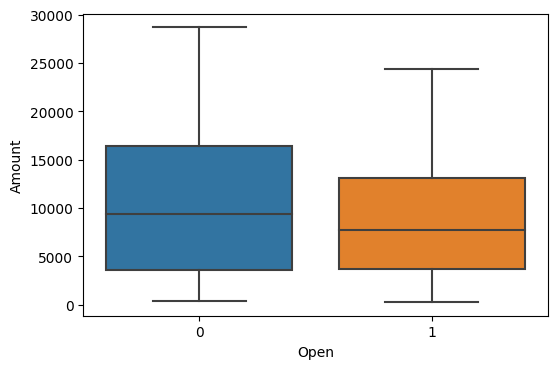

open_tm=0 的异常值： Series([], Name: 订购金额, dtype: float64)
open_tm=1 的异常值： Series([], Name: 订购金额, dtype: float64)


In [152]:
import seaborn as sns
import numpy as np

merged_df=pd.read_csv('1_jd_tmall_raw_test.csv')

fig = plt.figure(dpi=100)
sns.boxplot(x='open_tm', y='订购金额', data=merged_df)
plt.xlabel('Open')
plt.ylabel('Amount')
plt.show()

# 分别计算异常值
x = merged_df['open_tm']
data_open_tm_0 = merged_df.loc[x == 0, '订购金额'] 
data_open_tm_1 = merged_df.loc[x == 1, '订购金额']

# 计算上下限
q1_0 = np.percentile(data_open_tm_0, 25)
q3_0 = np.percentile(data_open_tm_0, 75)
iqr_0 = q3_0 - q1_0
upper_limit_0 = q3_0 + 1.5 * iqr_0
lower_limit_0 = q1_0 - 1.5 * iqr_0

q1_1 = np.percentile(data_open_tm_1, 25)
q3_1 = np.percentile(data_open_tm_1, 75)
iqr_1 = q3_1 - q1_1
upper_limit_1 = q3_1 + 1.5 * iqr_1
lower_limit_1 = q1_1 - 1.5 * iqr_1

# 标识异常值
outliers_0 = data_open_tm_0[(data_open_tm_0 > upper_limit_0) | (data_open_tm_0 < lower_limit_0)]
outliers_1 = data_open_tm_1[(data_open_tm_1 > upper_limit_1) | (data_open_tm_1 < lower_limit_1)]

print("open_tm=0 的异常值：", outliers_0)
print("open_tm=1 的异常值：", outliers_1)

In [68]:
# # 删除异常值
# mask = (merged_df['订购金额'] >= 29233.11) & (merged_df['open_tm'] == 1)

# # 删除符合条件的行
# merged_df.drop(merged_df[mask].index, inplace=True)

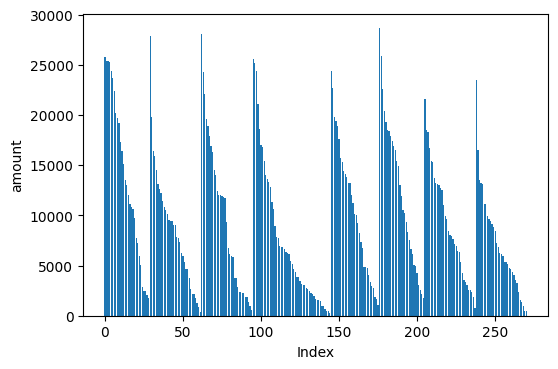

In [153]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 获取系统中可用的中文字体
font_path = '/System/Library/Fonts/PingFang.ttc'  # 替换为您系统中的字体文件路径
prop = fm.FontProperties(fname=font_path)

# 创建柱状图
plt.figure(dpi=100)
plt.bar(merged_df.index, merged_df['订购金额'])

# 设置x轴标签
plt.xlabel('Index')

# 设置y轴标签
plt.ylabel('amount')

# 显示图形
plt.show()

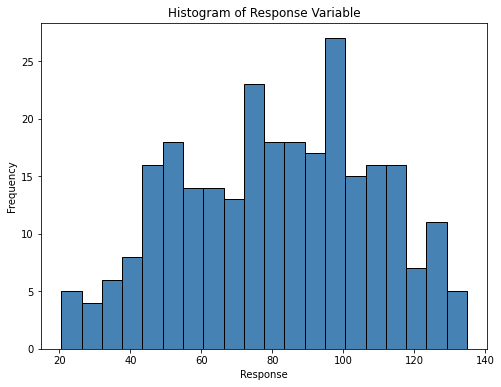

/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_94084/3357466792.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




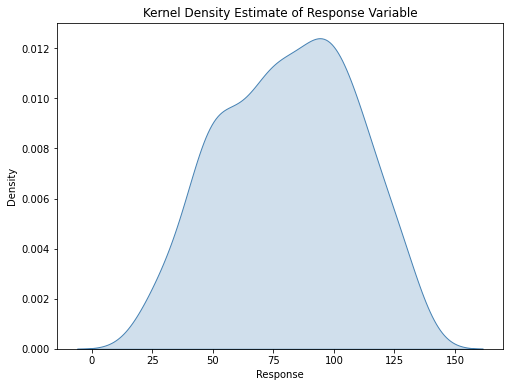

Skewness: -0.11314402195253281
Kurtosis: -0.8561726716825162


In [188]:
# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, color='steelblue', edgecolor='black')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Histogram of Response Variable')
plt.show()

# 绘制核密度估计图
plt.figure(figsize=(8, 6))
sns.kdeplot(y, color='steelblue', shade=True)
plt.xlabel('Response')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Response Variable')
plt.show()

from scipy.stats import skew, kurtosis
data_skewness = skew(y)
data_kurtosis = kurtosis(y)

print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)

In [179]:
merged_df=pd.read_csv('1_jd_tmall_raw_test.csv')

In [180]:
import statsmodels.api as sm
#X = merged_df[['open_tm', 'coverage_tm']]
X = merged_df[['open_tm', 'coverage_tm']]
y = merged_df['订购金额']

# 添加常数列
X = sm.add_constant(X)

#X = np.asarray(X)
#y = np.asarray(y)

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 输出系数表
print(model.summary().tables[1])
print(model.summary().tables[0])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.065e+04    616.519     17.273      0.000    9435.245    1.19e+04
open_tm     -3790.5418   1156.538     -3.277      0.001   -6067.598   -1513.486
coverage_tm   431.4257    178.121      2.422      0.016      80.732     782.119
                            OLS Regression Results                            
Dep. Variable:                   订购金额   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     5.395
Date:                Sat, 16 Mar 2024   Prob (F-statistic):            0.00504
Time:                        13:40:02   Log-Likelihood:                -2777.1
No. Observations:                 271   AIC:                             5560.
Df Residuals:                     268   BIC:   

In [182]:
# 使用Box-Cox变换
transformed_y, lambda_val = stats.boxcox(merged_df['订购金额'])

In [183]:
dummy_variables = pd.get_dummies(merged_df['出货_month_number'],prefix='出货_month_number')
merged_df = pd.concat([merged_df, dummy_variables], axis=1)

X = merged_df[['open_tm', 'coverage_tm',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1']]
# ,'otc0','otc1','otc2','tmall_jd','platform_open'

y = transformed_y
# merged_df['订购金额']

# 添加常数列
X = sm.add_constant(X)

#X = np.asarray(X)
#y = np.asarray(y)

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 输出系数表
print(model.summary().tables[1])
print(model.summary().tables[0])

                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       75.0335      2.708     27.707      0.000      69.701      80.366
open_tm                    -12.0011      5.465     -2.196      0.029     -22.761      -1.241
coverage_tm                  1.7121      0.687      2.494      0.013       0.360       3.064
出货_month_number_2021/1/1    20.2277      5.059      3.998      0.000      10.265      30.190
出货_month_number_2021/2/1     3.4284      4.836      0.709      0.479      -6.093      12.950
出货_month_number_2021/3/1     7.2609      4.461      1.628      0.105      -1.524      16.046
出货_month_number_2021/4/1    -1.4452      3.575     -0.404      0.686      -8.484       5.594
出货_month_number_2021/5/1    14.8342      4.753      3.121      0.002       5.475      24.193
出货_month_number_2021/6/1    20.5735      4.861      4.233      0.000  

In [184]:
summary = model.summary2()
# 打印回归结果
print(summary)

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.082    
Dependent Variable:     y                  AIC:                  2546.7509
Date:                   2024-03-16 13:41   BIC:                  2582.7721
No. Observations:       271                Log-Likelihood:       -1263.4  
Df Model:               9                  F-statistic:          3.686    
Df Residuals:           261                Prob (F-statistic):   0.000230 
R-squared:              0.113              Scale:                680.97   
--------------------------------------------------------------------------
                          Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
--------------------------------------------------------------------------
const                     75.0335   2.7081 27.7075 0.0000  69.7011 80.3659
open_tm                  -12.0011   5.4645 -2.1962 0.0290 -22.7613 -1.2409
coverage_tm                1.7121   0.6866  2.4

残差不服从正态分布，Shapiro-Wilk:p-value=4.529206489678472e-05
                    Variable       VIF
0                      const  0.000000
1                    open_tm  2.949472
2                coverage_tm  1.963075
3   出货_month_number_2021/1/1       inf
4   出货_month_number_2021/2/1       inf
5   出货_month_number_2021/3/1       inf
6   出货_month_number_2021/4/1       inf
7   出货_month_number_2021/5/1       inf
8   出货_month_number_2021/6/1       inf
9   出货_month_number_2021/7/1       inf
10  出货_month_number_2021/8/1       inf


/Users/lesliedeng/miniforge3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/lesliedeng/miniforge3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



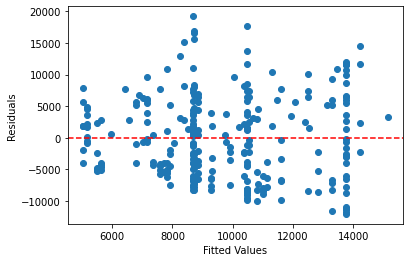

In [178]:
import scipy.stats as stats
# 1、计算模型的残差（residuals）
residuals = model.resid

# 使用正态性检验（如Shapiro-Wilk检验）检验残差的正态性
_, p_value = stats.shapiro(residuals)

# 打印检验结果
if p_value > 0.05:
    print(f"残差服从正态分布，Shapiro-Wilk:p-value={p_value}")
else:
    print(f"残差不服从正态分布，Shapiro-Wilk:p-value={p_value}")
    

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2、计算解释变量的方差膨胀因子（VIF）
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印VIF结果
print(vif)

plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# GLS

In [189]:
GLS_model = sm.GLM(y, X)
GLS_result = GLS_model.fit()

# 打印回归结果
print(GLS_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  271
Model:                            GLM   Df Residuals:                      261
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                          680.97
Method:                          IRLS   Log-Likelihood:                -1263.4
Date:                Sat, 16 Mar 2024   Deviance:                   1.7773e+05
Time:                        13:44:59   Pearson chi2:                 1.78e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1158
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

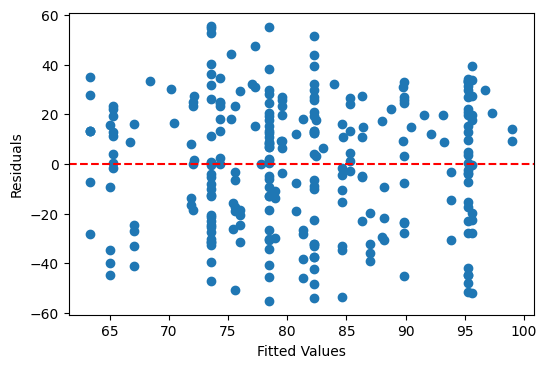

残差不服从正态分布，Shapiro-Wilk:p-value=0.0001558981603011489
White test p-value: 0.5857934368355595


In [190]:
# 绘制残差图
residuals = GLS_result.resid_deviance.copy()
fig = plt.figure(dpi=100)
plt.scatter(GLS_result.mu, residuals) #mu fittedvalues
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 使用正态性检验（如Shapiro-Wilk检验）检验残差的正态性
_, p_value = stats.shapiro(residuals)

# 打印检验结果
if p_value > 0.05:
    print(f"残差服从正态分布，Shapiro-Wilk:p-value={p_value}")
else:
    print(f"残差不服从正态分布，Shapiro-Wilk:p-value={p_value}")

# 进行异方差性检验
_, p_value, _, _ = sm.stats.diagnostic.het_white(residuals, sm.add_constant(X))
print("White test p-value:", p_value)

# 回归2-平台

In [283]:
reg_2_df = pd.read_csv('回归/2_open_tm+jd_regression_df_test.csv')
reg_2_df = reg_2_df.dropna()

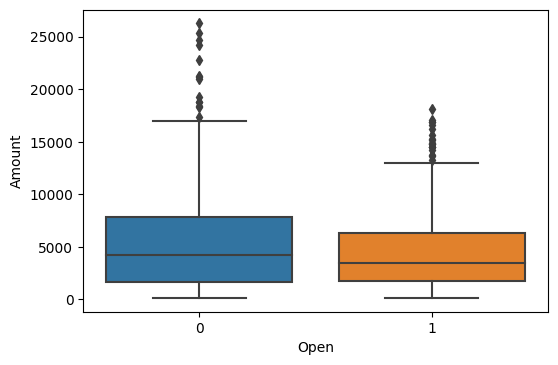

In [284]:
fig = plt.figure(dpi=100)
sns.boxplot(x='open', y='订购金额', data=reg_2_df)
plt.xlabel('Open')
plt.ylabel('Amount')
plt.show()

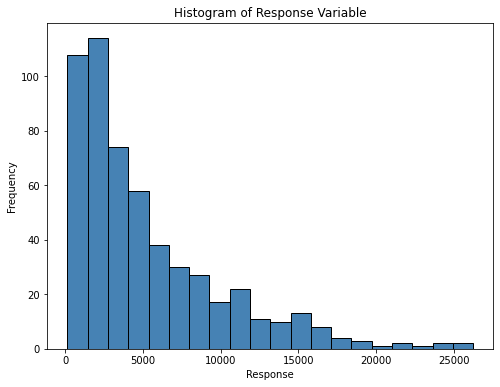

/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_94084/1381940611.py:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




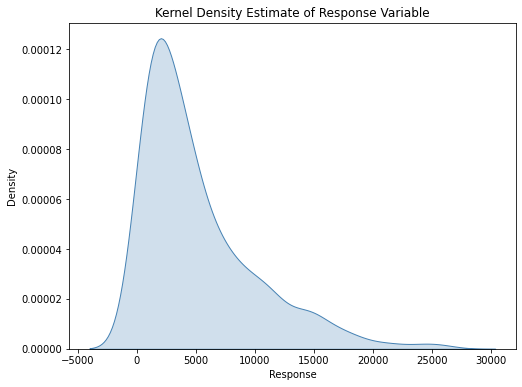

Skewness: 1.520219016756108
Kurtosis: 2.2881245155402015


In [285]:
y = reg_2_df['订购金额']

# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, color='steelblue', edgecolor='black')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Histogram of Response Variable')
plt.show()

# 绘制核密度估计图
plt.figure(figsize=(8, 6))
sns.kdeplot(y, color='steelblue', shade=True)
plt.xlabel('Response')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Response Variable')
plt.show()

from scipy.stats import skew, kurtosis
data_skewness = skew(y)
data_kurtosis = kurtosis(y)

print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)

In [286]:
dummy_variables = pd.get_dummies(reg_2_df['出货_month_number'],prefix='出货_month_number')
reg_2_df = pd.concat([reg_2_df, dummy_variables], axis=1)

X = reg_2_df[['open', 'coverage',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1',
              'tm_jd']]

# ,'otc0','otc1','otc2','tmall_jd','platform_open'

y_log = np.log(y)
# y = transformed_y
# merged_df['订购金额']

# 添加常数列
X = sm.add_constant(X)

#X = np.asarray(X)
#y = np.asarray(y)

# 拟合线性回归模型
model = sm.OLS(y_log, X).fit()

# 输出系数表
print(model.summary().tables[1])
print(model.summary().tables[0])

                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.6576      0.077     99.490      0.000       7.506       7.809
open                        -0.2355      0.125     -1.887      0.060      -0.481       0.010
coverage                     0.0438      0.017      2.636      0.009       0.011       0.076
出货_month_number_2021/1/1     1.2991      0.120     10.784      0.000       1.062       1.536
出货_month_number_2021/2/1     0.8615      0.123      7.019      0.000       0.620       1.103
出货_month_number_2021/3/1     1.0429      0.109      9.530      0.000       0.828       1.258
出货_month_number_2021/4/1     0.5723      0.092      6.216      0.000       0.391       0.753
出货_month_number_2021/5/1     1.0761      0.118      9.155      0.000       0.845       1.307
出货_month_number_2021/6/1     1.2715      0.120     10.593      0.000  

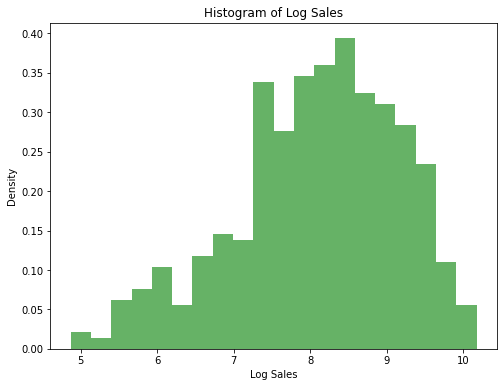

In [287]:
# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(y_log, bins=20, density=True, alpha=0.6, color='g')
plt.title('Histogram of Log Sales')
plt.xlabel('Log Sales')
plt.ylabel('Density')
plt.show()

In [288]:
#独立线性回归
X_tm = reg_2_df.loc[reg_2_df['tm_jd'] == 0, ['open', 'coverage',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1',
              ]]
X_jd = reg_2_df.loc[reg_2_df['tm_jd'] == 1, ['open', 'coverage',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1',
              ]]

y_tm = reg_2_df.loc[reg_2_df['tm_jd'] == 0, '订购金额']
y_jd = reg_2_df.loc[reg_2_df['tm_jd'] == 1, '订购金额']

y_tm_log = np.log(y_tm)
y_jd_log = np.log(y_jd)
# y = transformed_y
# merged_df['订购金额']

# 添加常数列
X_tm = sm.add_constant(X_tm)
X_jd = sm.add_constant(X_jd)


# 拟合线性回归模型
model_tm = sm.OLS(y_tm_log, X_tm).fit()
model_jd = sm.OLS(y_jd_log, X_jd).fit()

# 输出系数表
print(model_tm.summary().tables[1])
print(model_jd.summary().tables[1])
print(model_tm.summary().tables[0])
print(model_jd.summary().tables[0])

                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.6252      0.098     78.050      0.000       7.433       7.818
open                        -0.1158      0.176     -0.658      0.511      -0.462       0.231
coverage                     0.0341      0.023      1.490      0.137      -0.011       0.079
出货_month_number_2021/1/1     1.4314      0.172      8.303      0.000       1.092       1.771
出货_month_number_2021/2/1     0.8860      0.175      5.062      0.000       0.541       1.231
出货_month_number_2021/3/1     1.0902      0.160      6.816      0.000       0.775       1.405
出货_month_number_2021/4/1     0.4707      0.129      3.657      0.000       0.217       0.724
出货_month_number_2021/5/1     0.9880      0.170      5.807      0.000       0.653       1.323
出货_month_number_2021/6/1     1.2645      0.170      7.421      0.000  

In [289]:
#独立线性回归
X_tm = reg_2_df.loc[reg_2_df['tm_jd'] == 0, ['open', 'coverage',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1',
              ]]
X_jd = reg_2_df.loc[reg_2_df['tm_jd'] == 1, ['open', 'coverage',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1',
              ]]

y_tm = reg_2_df.loc[reg_2_df['tm_jd'] == 0, '订购金额']
y_jd = reg_2_df.loc[reg_2_df['tm_jd'] == 1, '订购金额']

y_tm_log = np.log(y_tm)
y_jd_log = np.log(y_jd)
# y = transformed_y
# merged_df['订购金额']

# 添加常数列
X_tm = sm.add_constant(X_tm)
X_jd = sm.add_constant(X_jd)


# 拟合线性回归模型
model_tm = sm.OLS(y_tm, X_tm).fit()
model_jd = sm.OLS(y_jd, X_jd).fit()

# 输出系数表
print(model_tm.summary().tables[1])
print(model_jd.summary().tables[1])
print(model_tm.summary().tables[0])
print(model_jd.summary().tables[0])

                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7038.9771    543.811     12.944      0.000    5968.236    8109.718
open                     -1625.1317    979.972     -1.658      0.098   -3554.655     304.391
coverage                   280.0015    127.492      2.196      0.029      28.976     531.027
出货_month_number_2021/1/1  4043.5097    959.545      4.214      0.000    2154.208    5932.811
出货_month_number_2021/2/1  -545.7480    974.279     -0.560      0.576   -2464.061    1372.565
出货_month_number_2021/3/1  2337.7223    890.236      2.626      0.009     584.887    4090.557
出货_month_number_2021/4/1 -1125.1178    716.398     -1.571      0.117   -2535.675     285.439
出货_month_number_2021/5/1   942.9044    946.972      0.996      0.320    -921.642    2807.451
出货_month_number_2021/6/1  2818.7309    948.538      2.972      0.003  

In [310]:
reg_2_2_df = pd.read_csv(
    '/Users/lesliedeng/Desktop/毕设/code/回归/accept data/2_2_open_tm+jd_regression_df_test.csv')

In [311]:
dummy_variables = pd.get_dummies(reg_2_2_df['出货_month_number'],prefix='出货_month_number')
reg_2_2_df = pd.concat([reg_2_2_df, dummy_variables], axis=1)

dummy_variables = pd.get_dummies(reg_2_2_df['出货_month_number'],prefix='出货_month_number')

reg_2_2_df['y_tm'] = reg_2_2_df.groupby(['store_id', '出货_month_number', 'open'])['y_tm'].transform('max')
reg_2_2_df

,store_id,出货_month_number,open,订购金额,setup_time,overlap01,store1,time,coverage,tm_jd,y_tm,y_jd,出货_month_number_2021/1/1,出货_month_number_2021/2/1,出货_month_number_2021/3/1,出货_month_number_2021/4/1,出货_month_number_2021/5/1,出货_month_number_2021/6/1,出货_month_number_2021/7/1,出货_month_number_2021/8/1
0,C571,2021/8/1,1,2550.40,2021/3/1,2021/8/31,C571,2021/8/31,11,1,NaN,2550.4,0,0,0,0,0,0,0,1
1,C569,2021/8/1,1,2181.90,2021/3/1,2021/8/31,C569,2021/8/31,5,1,NaN,2181.9,0,0,0,0,0,0,0,1
2,C563,2021/8/1,1,219.00,2021/3/1,2021/8/31,C563,2021/8/31,9,1,NaN,219.0,0,0,0,0,0,0,0,1
3,C562,2021/8/1,1,1617.60,2021/3/1,2021/8/31,C562,2021/8/31,5,1,NaN,1617.6,0,0,0,0,0,0,0,1
4,C365,2021/8/1,1,4170.80,2021/7/1,2021/8/31,C365,2021/8/31,1,1,NaN,4170.8,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,B942,2021/1/1,0,4445.23,2021/4/1,2021/3/31,B942,2021/3/31,0,0,4445.23,NaN,1,0,0,0,0,0,0,0
541,B208,2021/1/1,1,14872.26,2021/4/1,2021/3/31,B208,2021/3/31,0,0,14872.26,NaN,1,0,0,0,0,0,0,0
542,A793,2021/1/1,0,2217.12,2021/4/1,2021/3/31,A793,2021/3/31,0,0,2217.12,NaN,1,0,0,0,0,0,0,0
543,A602,2021/1/1,0,14711.62,2021/3/1,2021/2/28,A602,2021/2/28,0,0,14711.62,NaN,1,0,0,0,0,0,0,0


,store_id,出货_month_number,open,订购金额,setup_time,overlap01,store1,time,coverage,tm_jd,y_tm,y_jd,出货_month_number_2021/1/1,出货_month_number_2021/2/1,出货_month_number_2021/3/1,出货_month_number_2021/4/1,出货_month_number_2021/5/1,出货_month_number_2021/6/1,出货_month_number_2021/7/1,出货_month_number_2021/8/1
0,C571,2021/8/1,1,2550.40,2021/3/1,2021/8/31,C571,2021/8/31,11,1,10940.73,2550.4,0,0,0,0,0,0,0,1
1,C569,2021/8/1,1,2181.90,2021/3/1,2021/8/31,C569,2021/8/31,5,1,11069.10,2181.9,0,0,0,0,0,0,0,1
2,C563,2021/8/1,1,219.00,2021/3/1,2021/8/31,C563,2021/8/31,9,1,2109.65,219.0,0,0,0,0,0,0,0,1
3,C562,2021/8/1,1,1617.60,2021/3/1,2021/8/31,C562,2021/8/31,5,1,4668.15,1617.6,0,0,0,0,0,0,0,1
4,C365,2021/8/1,1,4170.80,2021/7/1,2021/8/31,C365,2021/8/31,1,1,5803.08,4170.8,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,B942,2021/1/1,0,4445.23,2021/4/1,2021/3/31,B942,2021/3/31,0,0,4445.23,NaN,1,0,0,0,0,0,0,0
541,B208,2021/1/1,1,14872.26,2021/4/1,2021/3/31,B208,2021/3/31,0,0,14872.26,NaN,1,0,0,0,0,0,0,0
542,A793,2021/1/1,0,2217.12,2021/4/1,2021/3/31,A793,2021/3/31,0,0,2217.12,NaN,1,0,0,0,0,0,0,0
543,A602,2021/1/1,0,14711.62,2021/3/1,2021/2/28,A602,2021/2/28,0,0,14711.62,NaN,1,0,0,0,0,0,0,0


In [316]:
reg_2_2_df.to_csv('2_2_open_tm+jd_regression_df_test_.csv')

In [18]:
import pandas as pd
reg_2_2_df=pd.read_csv('/Users/lesliedeng/Desktop/毕设/code/2_2_open_tm+jd_regression_df_test_.csv')
reg_2_2_df.dropna()

dummy_variables = pd.get_dummies(reg_2_2_df['出货_month_number'],prefix='出货_month_number')
reg_2_2_df = pd.concat([reg_2_2_df, dummy_variables], axis=1)

reg_2_2_df

,store_id,出货_month_number,open,订购金额,setup_time,overlap01,store1,time,coverage,tm_jd,open*platform,出货_month_number_2021/1/1,出货_month_number_2021/2/1,出货_month_number_2021/3/1,出货_month_number_2021/4/1,出货_month_number_2021/5/1,出货_month_number_2021/6/1,出货_month_number_2021/7/1,出货_month_number_2021/8/1
0,C365,2021/4/1,1,18128.96,2021/7/1,2021/6/30,C365,2021/6/30,0,0,0,0,0,0,1,0,0,0,0
1,C137,2021/3/1,1,17060.14,2021/7/1,2021/6/30,C137,2021/6/30,0,0,0,0,0,1,0,0,0,0,0
2,C140,2021/1/1,1,16899.29,2021/3/1,2021/2/28,C140,2021/2/28,0,0,0,1,0,0,0,0,0,0,0
3,C571,2021/7/1,1,16884.61,2021/3/1,2021/7/31,C571,2021/7/31,10,0,0,0,0,0,0,0,0,1,0
4,C051,2021/1/1,1,16589.05,2021/4/1,2021/3/31,C051,2021/3/31,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,C098,2021/2/1,0,257.02,2021/4/1,2021/3/31,C098,2021/3/31,0,1,0,0,1,0,0,0,0,0,0
541,C022,2021/7/1,1,130.00,2021/4/1,2021/7/31,C022,2021/7/31,7,1,1,0,0,0,0,0,0,1,0
542,C569,2021/3/1,0,224.90,2021/3/1,2021/2/28,C569,2021/2/28,0,0,0,0,0,1,0,0,0,0,0
543,C022,2021/3/1,0,145.50,2021/4/1,2021/3/31,C022,2021/3/31,0,1,0,0,0,1,0,0,0,0,0


In [19]:
import statsmodels.api as sm
#joint regression

y = reg_2_2_df['订购金额']
X = reg_2_2_df[['open', 'coverage','tm_jd', 'open*platform',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1']]

X = sm.add_constant(X)
# 构建并拟合模型
model = sm.OLS(y, X)
results = model.fit()

# 输出模型结果摘要
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   订购金额   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     22.91
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.56e-38
Time:                        12:11:11   Log-Likelihood:                -5292.0
No. Observations:                 545   AIC:                         1.061e+04
Df Residuals:                     533   BIC:                         1.066e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# 类别

In [209]:
import pandas as pd
import numpy as np
reg_3_df=pd.read_csv('/Users/lesliedeng/Desktop/毕设/code/回归/accept data/勿动3_1jd+tm_raw_test.csv')

In [145]:
#reg_3_df['open*otc'] = reg_3_df['open']*reg_3_df['otc']

reg_3_df['open*tm_jd'] = reg_3_df['open']*reg_3_df['tm_jd']

#reg_3_df['open*tm_jd*otc'] = reg_3_df['open']*reg_3_df['tm_jd']*reg_3_df['otc']

# reg_3_df['open_pre1*otc'] = reg_3_df['open_pre1']*reg_3_df['otc']

# reg_3_df['open_pre1*tm_jd'] = reg_3_df['open_pre1']*reg_3_df['tm_jd']

In [169]:
reg_3_df=reg_3_df.dropna()

In [34]:
reg_3_df.to_csv('3_1上网.csv')

In [139]:
dummy_variables = pd.get_dummies(reg_3_df['出货_month_number'],prefix='出货_month').astype(int)
reg_3_df = pd.concat([reg_3_df, dummy_variables], axis=1)
reg_3_df=reg_3_df.dropna()

In [210]:
# 查看名为'column_name'的列
print(reg_3_df.columns.tolist())  # 列名称列表

['Unnamed: 0', 'store_id', '出货_month_number', 'open', 'otc', 'amount', 'setup_time', 'overlap01', 'store1', 'time', 'coverage', 'tm_jd', '出货_month_2021/1/1', '出货_month_2021/2/1', '出货_month_2021/3/1', '出货_month_2021/4/1', '出货_month_2021/5/1', '出货_month_2021/6/1', '出货_month_2021/7/1', '出货_month_2021/8/1', 'open*otc', 'open*tm_jd']


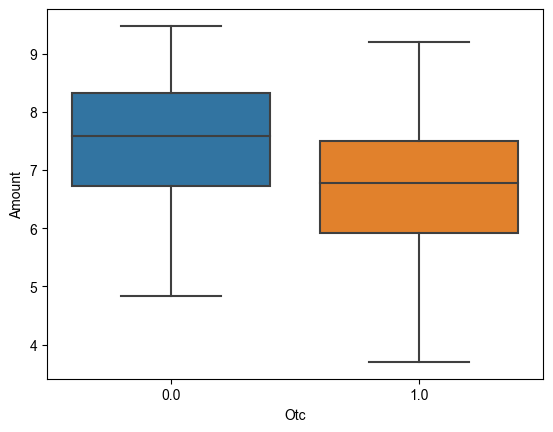

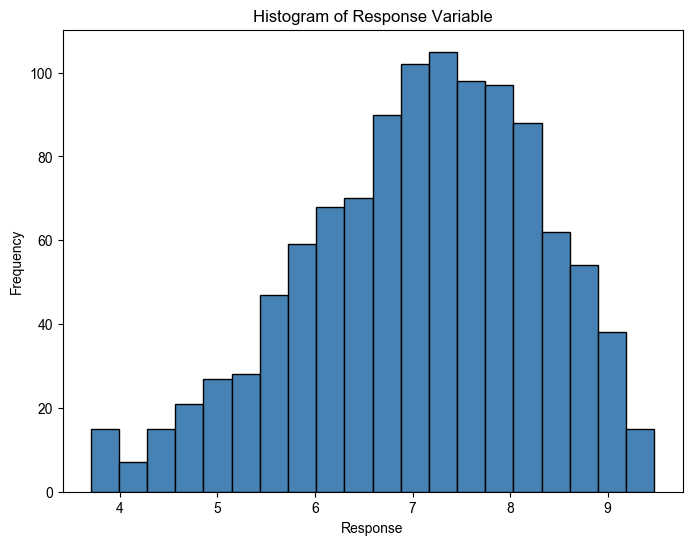

/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_40991/4200691382.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, color='steelblue', shade=True)


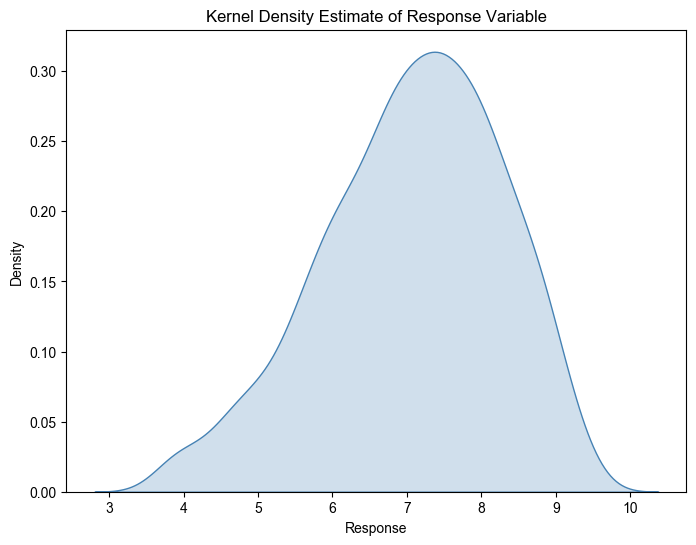

Skewness: -0.41781746971534567
Kurtosis: -0.3000054866003663


In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
y = np.log(reg_3_df['amount'])
#y = reg_3_df['amount']

fig = plt.figure(dpi=100)
sns.boxplot(x=reg_3_df['otc'],y = np.log(reg_3_df['amount']))
plt.xlabel('Otc')
plt.ylabel('Amount')
plt.show()

# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, color='steelblue', edgecolor='black')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Histogram of Response Variable')
plt.show()

# 绘制核密度估计图
plt.figure(figsize=(8, 6))
sns.kdeplot(y, color='steelblue', shade=True)
plt.xlabel('Response')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Response Variable')
plt.show()

from scipy.stats import skew, kurtosis
data_skewness = skew(y)
data_kurtosis = kurtosis(y)

print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)

In [173]:
reg_3_df['sales']=np.log(reg_3_df['amount'])

/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_40991/1529735514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_3_df['sales']=np.log(reg_3_df['amount'])


In [174]:
reg_3_df

,Unnamed: 0,store_id,出货_month_number,open,otc,amount,setup_time,overlap01,store1,time,...,出货_month_2021/2/1,出货_month_2021/3/1,出货_month_2021/4/1,出货_month_2021/5/1,出货_month_2021/6/1,出货_month_2021/7/1,出货_month_2021/8/1,open*otc,open*tm_jd,sales
0,0.0,C137,2021/6/1,0.0,0.0,13073.28,2021/7/1,2021/6/30,C137,2021/6/30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.478326
1,1.0,C125,2021/7/1,1.0,0.0,12543.20,2021/4/1,2021/7/31,C125,2021/7/31,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.436934
2,2.0,C125,2021/3/1,0.0,0.0,12500.73,2021/4/1,2021/3/31,C125,2021/3/31,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.433542
3,3.0,A864,2021/5/1,1.0,0.0,12433.26,2021/4/1,2021/5/31,A864,2021/5/31,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.428130
4,4.0,C137,2021/1/1,0.0,0.0,12388.87,2021/7/1,2021/6/30,C137,2021/6/30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.424554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,1101.0,C071,2021/4/1,0.0,1.0,43.00,2021/4/1,2021/3/31,C071,2021/3/31,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.761200
1102,1102.0,A793,2021/5/1,1.0,1.0,42.00,2021/4/1,2021/5/31,A793,2021/5/31,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.737670
1103,1103.0,C071,2021/4/1,1.0,1.0,42.00,2021/4/1,2021/5/1,C071,2021/5/1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.737670
1104,1104.0,C098,2021/2/1,0.0,1.0,41.10,2021/4/1,2021/3/31,C098,2021/3/31,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.716008


In [172]:
import statsmodels.api as sm
#joint regression

y=np.log(reg_3_df['amount'])

X = reg_3_df[['open',
    #'open_pre1',
              
              'coverage',
             # 'overlap01',
              'otc',
              'tm_jd',
              
             #'open_pre1*otc','open_pre1*tm_jd',
              'open*otc',
              'open*tm_jd',
              
              
            '出货_month_2021/2/1', '出货_month_2021/3/1', '出货_month_2021/4/1', '出货_month_2021/5/1', 
              '出货_month_2021/6/1', '出货_month_2021/7/1', '出货_month_2021/8/1'
             ]]
             

#'出货_month_2021/1/1','open*tm_jd*otc',
#base group是 非otc与天猫？

X = sm.add_constant(X)
# 构建并拟合模型
model = sm.OLS(y, X)
results = model.fit()

# 输出模型结果摘要
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     36.03
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.27e-75
Time:                        21:51:23   Log-Likelihood:                -1584.7
No. Observations:                1106   AIC:                             3197.
Df Residuals:                    1092   BIC:                             3267.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.2079      0.11

In [219]:
reg_3_df=reg_3_df.dropna()
reg_3_df.loc[:, 'sales'] = np.log(reg_3_df['amount'])
reg_3_df

/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_40991/623984548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_3_df.loc[:, 'sales'] = np.log(reg_3_df['amount'])


Unnamed: 0  open  otc    amount setup_time   
store_id 出货_month_number                                               
C137     2021-06-01              0.0   0.0  0.0  13073.28   2021/7/1  \
C125     2021-07-01              1.0   1.0  0.0  12543.20   2021/4/1   
         2021-03-01              2.0   0.0  0.0  12500.73   2021/4/1   
A864     2021-05-01              3.0   1.0  0.0  12433.26   2021/4/1   
C137     2021-01-01              4.0   0.0  0.0  12388.87   2021/7/1   
...                              ...   ...  ...       ...        ...   
C071     2021-04-01           1101.0   0.0  1.0     43.00   2021/4/1   
A793     2021-05-01           1102.0   1.0  1.0     42.00   2021/4/1   
C071     2021-04-01           1103.0   1.0  1.0     42.00   2021/4/1   
C098     2021-02-01           1104.0   0.0  1.0     41.10   2021/4/1   
         2021-03-01           1105.0   0.0  1.0     40.50   2021/4/1   

                          overlap01 store1       time  coverage  tm_jd  ...   
store_id 出货_month_number                                                ...   
C137     2021-06-01       2021/6/30   C137  2021/6/30       0.0    0.0  ...  \
C125     2021-07-01       2021/7/31   C125  2021/7/31       3.0    0.0  ...   
         2021-03-01       2021/3/31   C125  2021/3/31       0.0    0.0  ...   
A864     2021-05-01       2021/5/31   A864  2021/5/31       4.0    0.0  ...   
C137     2021-01-01       2021/6/30   C137  2021/6/30       0.0    0.0  ...   
...                             ...    ...        ...       ...    ...  ...   
C071     2021-04-01       2021/3/31   C071  2021/3/31       0.0    0.0  ...   
A793     2021-05-01       2021/5/31   A793  2021/5/31       2.0    1.0  ...   
C071     2021-04-01        2021/5/1   C071   2021/5/1       2.0    1.0  ...   
C098     2021-02-01       2021/3/31   C098  2021/3/31       0.0    0.0  ...   
         2021-03-01       2021/3/31   C098  2021/3/31       0.0    0.0  ...   

                          出货_month_2021/2/1  出货_month_2021/3/1   
store_id 出货_month_number                                         
C137     2021-06-01                     0.0                0.0  \
C125     2021-07-01                     0.0                0.0   
         2021-03-01                     0.0                1.0   
A864     2021-05-01                     0.0                0.0   
C137     2021-01-01                     0.0                0.0   
...                                     ...                ...   
C071     2021-04-01                     0.0                0.0   
A793     2021-05-01                     0.0                0.0   
C071     2021-04-01                     0.0                0.0   
C098     2021-02-01                     1.0                0.0   
         2021-03-01                     0.0                1.0   

                          出货_month_2021/4/1  出货_month_2021/5/1   
store_id 出货_month_number                                         
C137     2021-06-01                     0.0                0.0  \
C125     2021-07-01                     0.0                0.0   
         2021-03-01                     0.0                0.0   
A864     2021-05-01                     0.0                1.0   
C137     2021-01-01                     0.0                0.0   
...                                     ...                ...   
C071     2021-04-01                     1.0                0.0   
A793     2021-05-01                     0.0                1.0   
C071     2021-04-01                     1.0                0.0   
C098     2021-02-01                     0.0                0.0   
         2021-03-01                     0.0                0.0   

                          出货_month_2021/6/1  出货_month_2021/7/1   
store_id 出货_month_number                                         
C137     2021-06-01                     1.0                0.0  \
C125     2021-07-01                     0.0                1.0   
         2021-03-01                     0.0                0.0   
A864     2021

In [214]:
reg_3_df.set_index(['store_id','出货_month_number'], inplace=True)

In [227]:
fe_model = PanelOLS.from_formula('sales ~ open + coverage + otc + tm_jd + open*otc + open*tm_jd + EntityEffects', data=reg_3_df)
fe_results = fe_model.fit()


print(fe_results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  sales   R-squared:                        0.4502
Estimator:                   PanelOLS   R-squared (Between):             -0.2577
No. Observations:                1106   R-squared (Within):               0.4502
Date:                Sat, Mar 30 2024   R-squared (Overall):             -0.2439
Time:                        23:00:42   Log-likelihood                   -1197.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      145.60
Entities:                          33   P-value                           0.0000
Avg Obs:                       33.515   Distribution:                  F(6,1067)
Min Obs:                       21.000                                           
Max Obs:                       36.000   F-statistic (robust):             145.60
                            

In [220]:
reg_3_df['sales']

store_id  出货_month_number
C137      2021-06-01         9.478326
C125      2021-07-01         9.436934
          2021-03-01         9.433542
A864      2021-05-01         9.428130
C137      2021-01-01         9.424554
                               ...   
C071      2021-04-01         3.761200
A793      2021-05-01         3.737670
C071      2021-04-01         3.737670
C098      2021-02-01         3.716008
          2021-03-01         3.701302
Name: sales, Length: 1106, dtype: float64

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 计算VIF
vif_data = pd.DataFrame()
XX=X[['open',
              
              'coverage',
              'otc',
              'tm_jd',
              
            
                'open*otc',
                'open*tm_jd',
                         ]]
vif_data['Features'] = XX.columns
vif_data['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

# 打印结果 通常，VIF大于5或10被认为存在较高的共线性。
print(vif_data)
print(XX.corr())

     Features       VIF
0        open  4.886082
1    coverage  2.831755
2         otc  2.945330
3       tm_jd  2.986370
4    open*otc  3.638599
5  open*tm_jd  3.645602
                open  coverage       otc     tm_jd  open*otc  open*tm_jd
open        1.000000  0.666552  0.006057  0.017173  0.569217    0.562827
coverage    0.666552  1.000000  0.002663  0.019475  0.378344    0.368089
otc         0.006057  0.002663  1.000000  0.019897  0.607251    0.011438
tm_jd       0.017173  0.019475  0.019897  1.000000  0.017762    0.616793
open*otc    0.569217  0.378344  0.607251  0.017762  1.000000    0.329359
open*tm_jd  0.562827  0.368089  0.011438  0.616793  0.329359    1.000000


In [105]:
from scipy import stats
for col1 in XX.columns:
    for col2 in XX.columns:
        if col1 != col2:
            corr, p_value = stats.pearsonr(XX[col1], XX[col2])
            if p_value < 0.05:
                print(f"{col1} and {col2} have a significant correlation. p-value: {p_value}")
            else:
                print(f"{col1} and {col2} do not have a significant correlation.")

open and coverage have a significant correlation. p-value: 2.7159640677302785e-144
open and otc do not have a significant correlation.
open and tm_jd do not have a significant correlation.
open and open*otc have a significant correlation. p-value: 7.93525220661257e-97
open and open*tm_jd have a significant correlation. p-value: 3.0174925862172755e-94
coverage and open have a significant correlation. p-value: 2.7159640677302785e-144
coverage and otc do not have a significant correlation.
coverage and tm_jd do not have a significant correlation.
coverage and open*otc have a significant correlation. p-value: 2.6786210187510072e-39
coverage and open*tm_jd have a significant correlation. p-value: 3.899613357533177e-37
otc and open do not have a significant correlation.
otc and coverage do not have a significant correlation.
otc and tm_jd do not have a significant correlation.
otc and open*otc have a significant correlation. p-value: 2.0193638938661968e-113
otc and open*tm_jd do not have a s

/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_40991/3504847576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.rename(columns={'tm_jd': 'platform'}, inplace=True)
/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_40991/3504847576.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.rename(columns={'open*tm_jd': 'open*platform'}, inplace=True)


<AxesSubplot:>

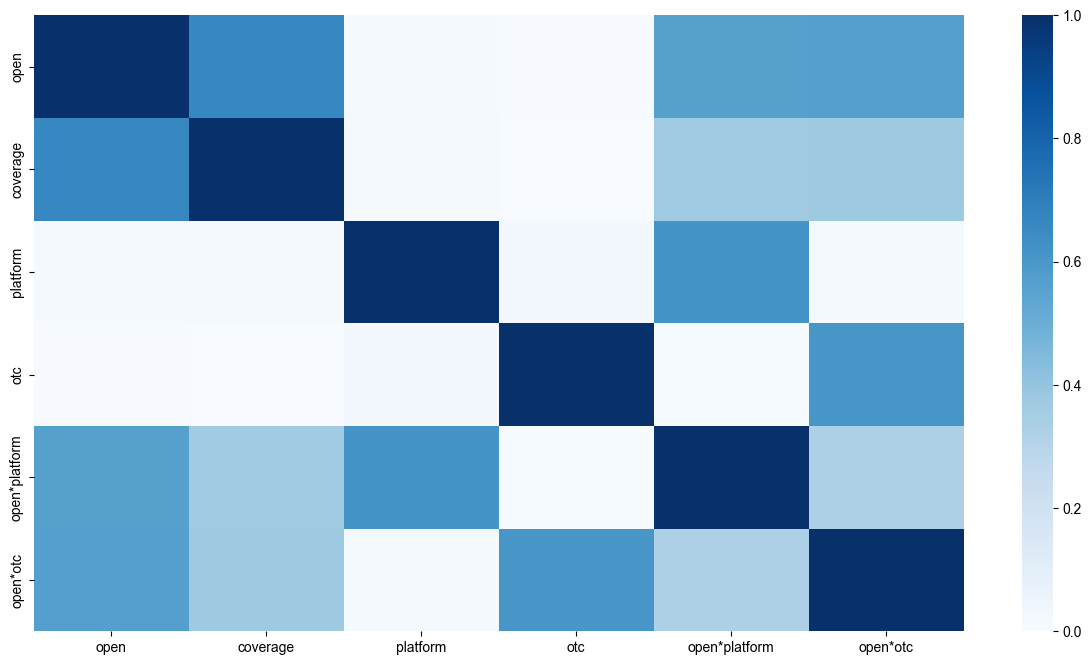

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 根据数值类型的列创建子集DataFrame
numerical_data = reg_3_df[['open', 'coverage', 'tm_jd','otc',
       
                             'open*tm_jd','open*otc'                           
       ]]

numerical_data.rename(columns={'tm_jd': 'platform'}, inplace=True)
numerical_data.rename(columns={'open*tm_jd': 'open*platform'}, inplace=True)

# 计算相关系数矩阵
corr_matrix = numerical_data.corr()
#设置字体
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'

plt.figure(figsize=(15, 8))  # 设置图形宽度为10，高度为8

# 使用seaborn绘制相关性矩阵的热力图
sns.heatmap(corr_matrix, vmin=0, vmax=1, cmap='Blues')


In [67]:
import statsmodels.api as sm
#joint regression

y = reg_3_df['amount']
X = reg_3_df[['open', 'coverage','tm_jd',
              'open*tm_jd',
               '出货_month_number_2021/1/1','出货_month_number_2021/2/1','出货_month_number_2021/3/1','出货_month_number_2021/4/1','出货_month_number_2021/5/1','出货_month_number_2021/6/1','出货_month_number_2021/7/1','出货_month_number_2021/8/1']]
# ,'otc',
#               'open*otc',
'open*tm_jd',
#               'open*tm_jd*otc'

X = sm.add_constant(X)
# 构建并拟合模型
model = sm.OLS(y, X)
results = model.fit()

# 输出模型结果摘要
print(results.summary())

KeyError: "['出货_month_number_2021/1/1', '出货_month_number_2021/2/1', '出货_month_number_2021/3/1', '出货_month_number_2021/4/1', '出货_month_number_2021/5/1', '出货_month_number_2021/6/1', '出货_month_number_2021/7/1', '出货_month_number_2021/8/1'] not in index"

In [48]:
reg_3_df.to_csv('3_reg_final.csv')

In [655]:
reg_3_2_df

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,行标签,平均值项:amount
2,0,433.152016
3,1,363.38456
4,2,435.98851
5,3,388.775135
6,4,427.139044
7,5,351.114336
8,6,322.451844
9,7,253.744333


In [151]:
import pandas as pd
import numpy as np
reg_3_2_df=pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/稳健性/稳健性_3km_jd+tm_df_nation.xlsx')

mon_dummy_variables = pd.get_dummies(reg_3_2_df['出货_month_number'],prefix='出货_month').astype(int)
cat_dummy_variables = pd.get_dummies(reg_3_2_df['national cata'],prefix='cate').astype(int)
reg_3_2_df = pd.concat([reg_3_2_df, mon_dummy_variables, cat_dummy_variables], axis=1)

In [152]:
# reg_3_2_df['open*otc'] = reg_3_2_df['open']*reg_3_2_df['otc']

reg_3_2_df['open*tm_jd'] = reg_3_2_df['open']*reg_3_2_df['tm_jd']

# reg_3_2_df['open*tm_jd*otc'] = reg_3_2_df['open']*reg_3_2_df['tm_jd']*reg_3_2_df['otc0']

In [153]:
for cata in ['cate_全身用抗感染药', 'cate_内科用药',
       'cate_呼吸系统', 'cate_外科用药', 'cate_妇科用药', 'cate_心血管系统',
        'cate_抗肿瘤药及免疫调节剂', 'cate_泌尿生殖系统药和性激素',
       'cate_消化道和代谢方面的药物', 'cate_皮肤病用药', 'cate_眼科用药', 'cate_神经系统药物',
       'cate_耳鼻喉科用药', 'cate_肌肉-骨骼系统药物', 'cate_血液和造血器官药','cate_骨伤科用药']:
    reg_3_2_df[f'open*{cata}'] = reg_3_2_df['open']*reg_3_2_df[f'{cata}']
    
#reg_3_2_df.to_csv('回归/3_2jd+tm_raw_test.csv')

In [714]:










reg_3_2_df=pd.read_csv('3_1_openlag1.csv')

In [154]:
variables = reg_3_2_df.columns
print(variables)

Index(['store_id', '出货_month_number', 'open', 'national cata', 'coverage',
       'amount', 'tm_jd', '出货_month_2021-01-01 00:00:00',
       '出货_month_2021-02-01 00:00:00', '出货_month_2021-03-01 00:00:00',
       '出货_month_2021-04-01 00:00:00', '出货_month_2021-05-01 00:00:00',
       '出货_month_2021-06-01 00:00:00', '出货_month_2021-07-01 00:00:00',
       '出货_month_2021-08-01 00:00:00', 'cate_全身用抗感染药', 'cate_内科用药',
       'cate_呼吸系统', 'cate_外科用药', 'cate_妇科用药', 'cate_心血管系统', 'cate_抗肿瘤药及免疫调节剂',
       'cate_泌尿生殖系统药和性激素', 'cate_消化道和代谢方面的药物', 'cate_皮肤病用药', 'cate_眼科用药',
       'cate_神经系统药物', 'cate_耳鼻喉科用药', 'cate_肌肉-骨骼系统药物', 'cate_血液和造血器官药',
       'cate_骨伤科用药', 'open*tm_jd', 'open*cate_全身用抗感染药', 'open*cate_内科用药',
       'open*cate_呼吸系统', 'open*cate_外科用药', 'open*cate_妇科用药', 'open*cate_心血管系统',
       'open*cate_抗肿瘤药及免疫调节剂', 'open*cate_泌尿生殖系统药和性激素',
       'open*cate_消化道和代谢方面的药物', 'open*cate_皮肤病用药', 'open*cate_眼科用药',
       'open*cate_神经系统药物', 'open*cate_耳鼻喉科用药', 'open*cate_肌肉-骨骼系统药物',
       'open

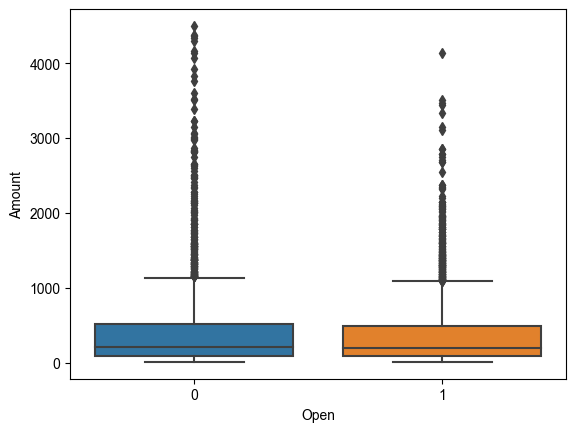

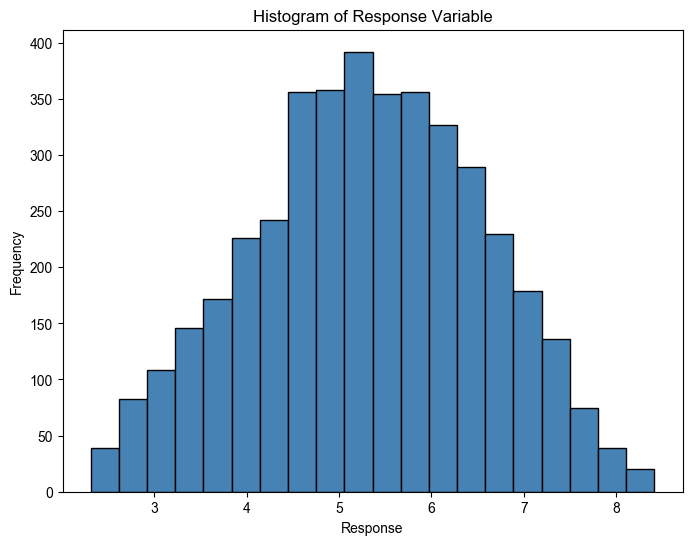

/var/folders/wl/9ldhxb4d4xl8x40cnvp2lv3h0000gn/T/ipykernel_40991/295139300.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, color='steelblue', shade=True)


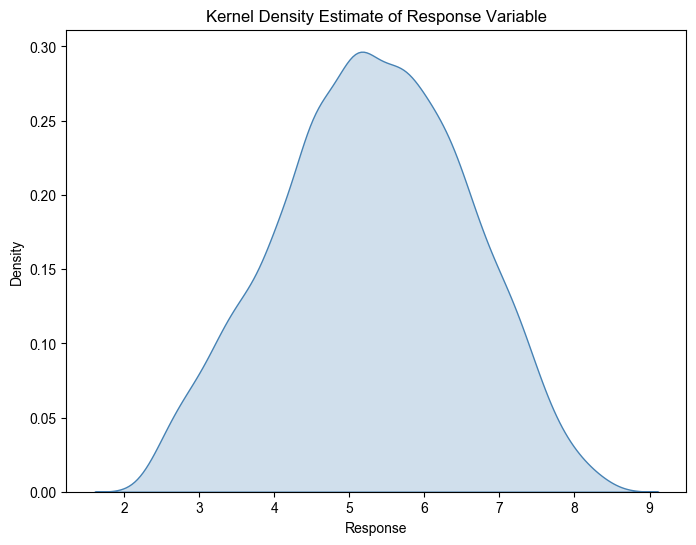

Skewness: -0.07021988477739072
Kurtosis: -0.5566265780999937


In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
y = np.log(reg_3_2_df['amount'])

fig = plt.figure(dpi=100)
sns.boxplot(x='open', y='amount', data=reg_3_2_df)
plt.xlabel('Open')
plt.ylabel('Amount')
plt.show()

# 绘制直方图
plt.figure(figsize=(8, 6))
plt.hist(y, bins=20, color='steelblue', edgecolor='black')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.title('Histogram of Response Variable')
plt.show()

# 绘制核密度估计图
plt.figure(figsize=(8, 6))
sns.kdeplot(y, color='steelblue', shade=True)
plt.xlabel('Response')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Response Variable')
plt.show()

from scipy.stats import skew, kurtosis
data_skewness = skew(y)
data_kurtosis = kurtosis(y)

print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)

In [166]:
import statsmodels.api as sm
#joint regression

X = reg_3_2_df[['open', 'coverage',
                 'tm_jd', 
            '出货_month_2021-02-01 00:00:00', '出货_month_2021-03-01 00:00:00',
       '出货_month_2021-04-01 00:00:00', '出货_month_2021-05-01 00:00:00',
       '出货_month_2021-06-01 00:00:00', '出货_month_2021-07-01 00:00:00',
       '出货_month_2021-08-01 00:00:00', 
                
        'cate_全身用抗感染药', 
       'cate_外科用药', 'cate_心血管系统', 'cate_抗肿瘤药及免疫调节剂',
       'cate_泌尿生殖系统药和性激素', 'cate_消化道和代谢方面的药物', 'cate_皮肤病用药', 
       'cate_神经系统药物', 'cate_肌肉-骨骼系统药物', 'cate_血液和造血器官药',
              
                'cate_呼吸系统', 
                'cate_骨伤科用药',
                'cate_内科用药','cate_妇科用药','cate_耳鼻喉科用药',
               
                
        'open*cate_全身用抗感染药', 
       'open*cate_外科用药', 'open*cate_心血管系统',
       'open*cate_抗肿瘤药及免疫调节剂', 'open*cate_泌尿生殖系统药和性激素',
       'open*cate_消化道和代谢方面的药物', 'open*cate_皮肤病用药', 
       'open*cate_神经系统药物', 'open*cate_肌肉-骨骼系统药物', 
                'open*cate_血液和造血器官药','open*cate_呼吸系统','open*cate_骨伤科用药','open*cate_内科用药',
                'open*cate_妇科用药','open*cate_耳鼻喉科用药',
                
                'open*tm_jd'
               ]]

#dummy要丢掉一个，
# 'open*cate_眼科用药',
#'cate_眼科用药',       '出货_month_number_2021-01-01', 两个不影响open
# open系数 就是base group'open*cate_眼科用药' 回归模型吸收了

X = sm.add_constant(X)
# 构建并拟合模型
model = sm.OLS(y, X)
results = model.fit()

# 输出模型结果摘要
print(results.summary())

#看到背后的内容 单独拿出来的分析 anicode 不显著的药品放在一个group是不是显著，能不能有新的名字和含义

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     32.31
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          6.79e-215
Time:                        14:58:47   Log-Likelihood:                -6163.2
No. Observations:                4127   AIC:                         1.241e+04
Df Residuals:                    4085   BIC:                         1.268e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<AxesSubplot:>

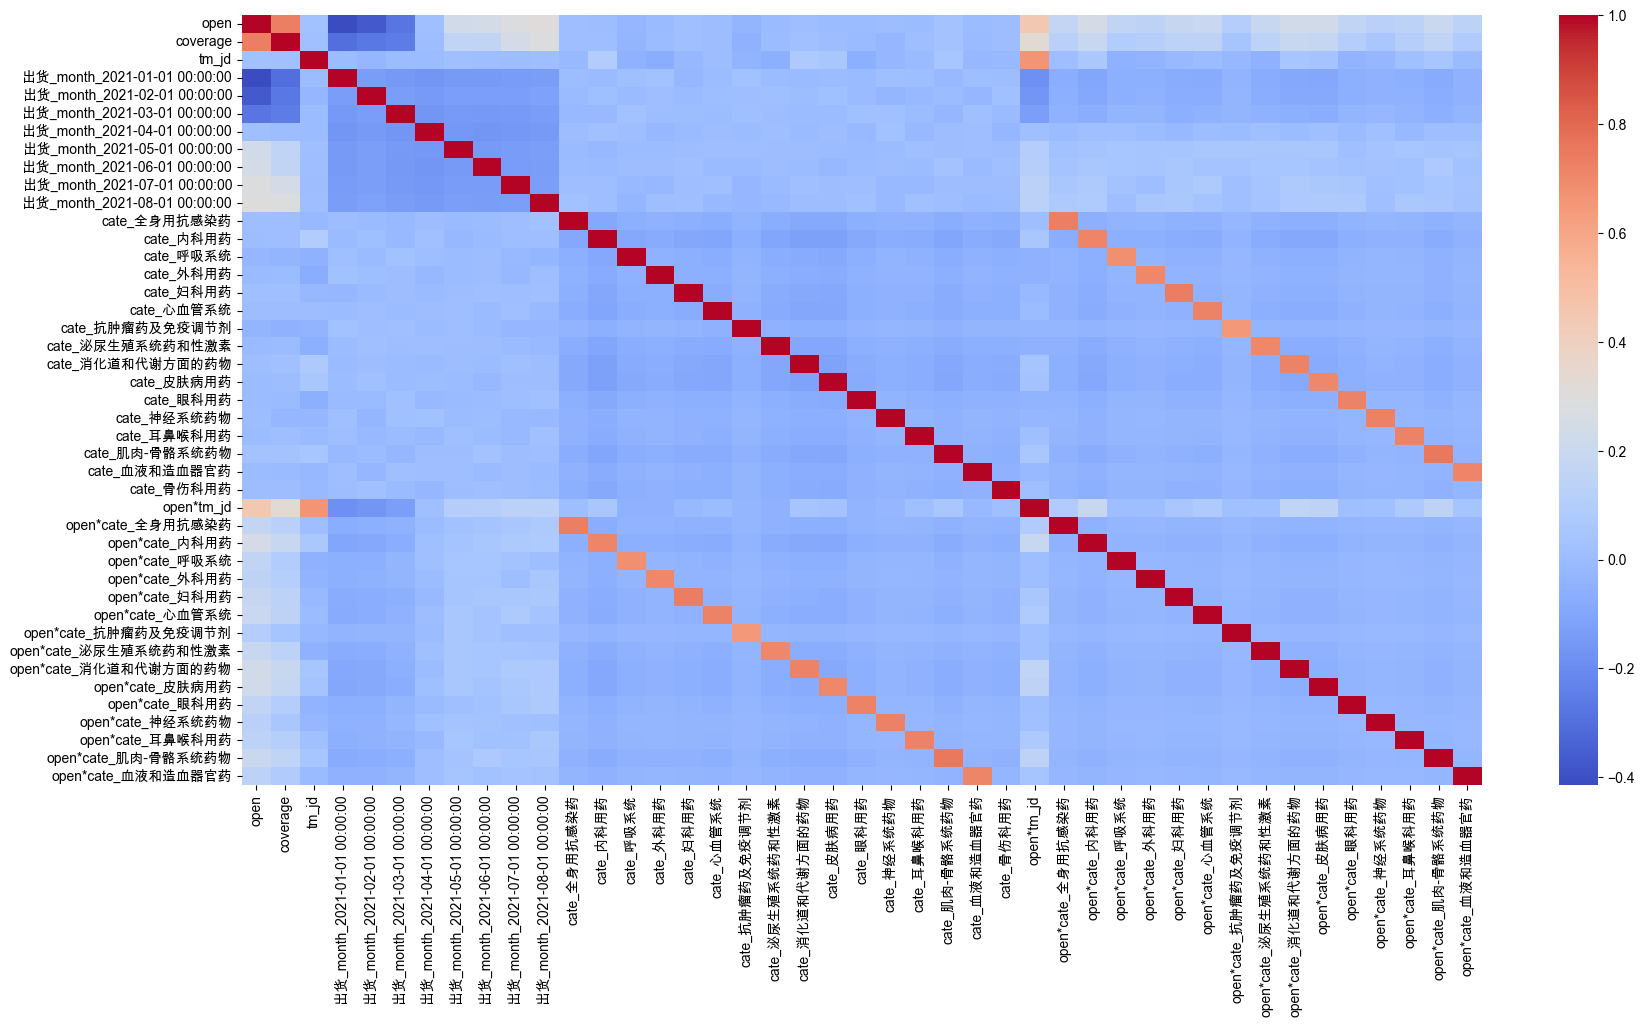

In [646]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 根据数值类型的列创建子集DataFrame
numerical_data = reg_3_2_df[['open', 'coverage', 'tm_jd',
       '出货_month_2021-01-01 00:00:00', '出货_month_2021-02-01 00:00:00',
       '出货_month_2021-03-01 00:00:00', '出货_month_2021-04-01 00:00:00',
       '出货_month_2021-05-01 00:00:00', '出货_month_2021-06-01 00:00:00',
       '出货_month_2021-07-01 00:00:00', '出货_month_2021-08-01 00:00:00',
       'cate_全身用抗感染药', 'cate_内科用药', 'cate_呼吸系统', 'cate_外科用药', 'cate_妇科用药',
       'cate_心血管系统', 'cate_抗肿瘤药及免疫调节剂', 'cate_泌尿生殖系统药和性激素', 'cate_消化道和代谢方面的药物',
       'cate_皮肤病用药', 'cate_眼科用药', 'cate_神经系统药物', 'cate_耳鼻喉科用药',
       'cate_肌肉-骨骼系统药物', 'cate_血液和造血器官药', 'cate_骨伤科用药', 
                            
                             'open*tm_jd',
                             
       'open*cate_全身用抗感染药', 'open*cate_内科用药', 'open*cate_呼吸系统',
       'open*cate_外科用药', 'open*cate_妇科用药', 'open*cate_心血管系统',
       'open*cate_抗肿瘤药及免疫调节剂', 'open*cate_泌尿生殖系统药和性激素',
       'open*cate_消化道和代谢方面的药物', 'open*cate_皮肤病用药', 'open*cate_眼科用药',
       'open*cate_神经系统药物', 'open*cate_耳鼻喉科用药', 'open*cate_肌肉-骨骼系统药物',
       'open*cate_血液和造血器官药']]

# 计算相关系数矩阵
corr_matrix = numerical_data.corr()
#设置字体
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'

plt.figure(figsize=(20, 10))  # 设置图形宽度为10，高度为8

# 使用seaborn绘制相关性矩阵的热力图
sns.heatmap(corr_matrix, cmap='coolwarm')

In [647]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 计算VIF
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 打印结果 通常，VIF大于5或10被认为存在较高的共线性。
print(vif_data)

                        Features        VIF
0                          const  48.901870
1                           open  22.399662
2                       coverage   2.208288
3                          tm_jd   2.270213
4   出货_month_2021-02-01 00:00:00   1.626851
5   出货_month_2021-03-01 00:00:00   1.782223
6   出货_month_2021-04-01 00:00:00   2.204315
7   出货_month_2021-05-01 00:00:00   2.474532
8   出货_month_2021-06-01 00:00:00   2.503712
9   出货_month_2021-07-01 00:00:00   2.568787
10  出货_month_2021-08-01 00:00:00   2.519895
11                  cate_全身用抗感染药   4.413134
12                     cate_外科用药   3.737140
13                    cate_心血管系统   4.907458
14               cate_抗肿瘤药及免疫调节剂   2.851423
15              cate_泌尿生殖系统药和性激素   4.824091
16              cate_消化道和代谢方面的药物   5.912961
17                    cate_皮肤病用药   5.984343
18                   cate_神经系统药物   3.396303
19                cate_肌肉-骨骼系统药物   5.034675
20                 cate_血液和造血器官药   3.552818
21                     cate_呼吸系统

In [436]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = reg_3_2_df[['open', 'coverage','tm_jd', 
            '出货_month_2021-01-01', '出货_month_2021-02-01',
       '出货_month_2021-03-01', '出货_month_2021-04-01', '出货_month_2021-05-01',
       '出货_month_2021-06-01', '出货_month_2021-07-01', '出货_month_2021-08-01',
                
        'cate_全身用抗感染药', 
       'cate_外科用药', 'cate_妇科用药', 'cate_心血管系统', 'cate_抗肿瘤药及免疫调节剂',
       'cate_泌尿生殖系统药和性激素', 'cate_消化道和代谢方面的药物', 'cate_皮肤病用药', 
       'cate_神经系统药物', 'cate_肌肉-骨骼系统药物', 'cate_血液和造血器官药','cate_眼科用药','open*cate_眼科用药',
              
                'cate_呼吸系统', 
                'cate_骨伤科用药',
                'cate_内科用药',
                'cate_耳鼻喉科用药',
                
        'open*cate_全身用抗感染药', 
       'open*cate_外科用药', 'open*cate_妇科用药', 'open*cate_心血管系统',
       'open*cate_抗肿瘤药及免疫调节剂', 'open*cate_泌尿生殖系统药和性激素',
       'open*cate_消化道和代谢方面的药物', 'open*cate_皮肤病用药', 
       'open*cate_神经系统药物', 'open*cate_肌肉-骨骼系统药物', 
                'open*cate_血液和造血器官药','open*cate_呼吸系统','open*cate_骨伤科用药','open*cate_内科用药','open*cate_耳鼻喉科用药',
                'open*tm_jd']]


# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建Ridge回归模型实例，alpha是正则化强度的参数
ridge_reg = Ridge(alpha=1.0)

# 训练模型
ridge_reg.fit(X_train, y_train)

# 预测测试集
y_pred = ridge_reg.predict(X_test)

# 计算模型的均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 打印模型的系数
print(ridge_reg.coef_)

Mean Squared Error: 1.184649435410164
[-0.12592067  0.00857964 -0.57305539  0.19922905 -0.21724315  0.10181475
 -0.15835306  0.03068511  0.214975    0.06600992 -0.23711761 -0.35823912
 -0.70443384 -0.22551338  0.7792424  -0.13814637  0.85592621  0.76426465
  0.41629058 -0.88360129 -0.06310901  0.01663378 -0.26170159 -0.36868904
 -0.15073536 -0.25063687  1.13687786 -0.93311864 -0.00794148  0.1836871
  0.16888595 -0.03485831 -0.29562064  0.10101246  0.02041108  0.01643207
  0.06902043  0.06554873  0.13517707  0.10748388 -0.30030603  0.06452289
 -0.05068681  0.07639008]


In [437]:
print(ridge_reg.score(X_test, y_test))

0.29531662104569334


# 滞后项

In [693]:
import pandas as pd

df1 = pd.read_csv('/Users/lesliedeng/Desktop/毕设/code/回归/accept data/勿动3_1jd+tm_raw_test.csv')
df2 = pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/回归/滞后性参考列表.xlsx')

In [698]:
from dateutil.relativedelta import relativedelta
df1['出货_month_number'] = pd.to_datetime(df1['出货_month_number'])

df2_sorted = df2.sort_values(['store_id', '出货_month_number'])
df2_lookup = df2_sorted.set_index(['store_id', '出货_month_number'])['open']

# 创建新列 wopen_pre1，默认值为0
df1['open_pre1'] = 0

# 遍历 df1 中的每一行，查找 df2 中上一个月 open2 的值
for i, row in df1.iterrows():
    if row['open'] == 1:
        prev_month = row['出货_month_number'] - relativedelta(months=1)
        try:
            # 查找上一个月对应store_id的open值
            prev_open = df2_lookup.at[(row['store_id'], prev_month)]
            df1.at[i, 'open_pre1'] = int(prev_open == 1)
        except KeyError:
            # 如果上一个月不存在，可以设置为缺失值或其他默认值
            pass

In [700]:
df1.to_csv('3_1_openlag1.csv')

In [ ]:
df1=pd.read_csv('3_1_openlag1.csv')

In [745]:
df1

,store_id,出货_month_number,open,otc,amount,setup_time,overlap01,store1,time,coverage,tm_jd,open_pre1,intercept
0,C137,2021-06-01,0,0,13073.28,2021/7/1,2021/6/30,C137,2021/6/30,0,0,0,1
1,C125,2021-07-01,1,0,12543.20,2021/4/1,2021/7/31,C125,2021/7/31,3,0,1,1
2,C125,2021-03-01,0,0,12500.73,2021/4/1,2021/3/31,C125,2021/3/31,0,0,0,1
3,A864,2021-05-01,1,0,12433.26,2021/4/1,2021/5/31,A864,2021/5/31,4,0,1,1
4,C137,2021-01-01,0,0,12388.87,2021/7/1,2021/6/30,C137,2021/6/30,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,A793,2021-05-01,1,1,22.70,2021/4/1,2021/5/31,A793,2021/5/31,2,1,1,1
1112,C563,2021-02-01,0,1,20.00,2021/3/1,2021/2/28,C563,2021/2/28,0,1,0,1
1113,C098,2021-02-01,0,1,16.50,2021/4/1,2021/3/31,C098,2021/3/31,0,0,0,1
1114,C098,2021-08-01,1,1,14.00,2021/4/1,2021/8/31,C098,2021/8/31,2,1,1,1


# logit

In [742]:
import statsmodels.formula.api as smf
# 添加截距项
df1['intercept'] = 1

model_formula = 'open ~ amount'
logit_model = smf.logit(model_formula, data=df1)

# 拟合模型
result = logit_model.fit(method='lbfgs')
print(result.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  4.54884D+00

At iterate    1    f=  6.93147D-01    |proj g|=  4.54884D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   4.549D+00   6.931D-01
  F =  0.69314718055994529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                           Logit Regression Results                           
Dep. Variable:                   open   No. Observati

 This problem is unconstrained.
/Users/lesliedeng/miniforge3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/lesliedeng/miniforge3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


# DID

In [266]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.formula.api as smf

In [330]:
did_df= pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/回归/did/DID.xlsx',sheet_name='raw_did')

In [331]:
did_df

,store_id,出货_week_number,tm_amount,tm_jd,jd_amount,sales,as,treat_week,treat_group
0,C108,30,5.00,1,NaN,5.00,4,1,1
1,C051,6,9.70,1,NaN,9.70,4,0,1
2,C083,4,9.70,1,NaN,9.70,4,0,1
3,C771,6,9.70,1,NaN,9.70,0_4,0,0
4,C399,3,11.05,1,NaN,11.05,0_4,0,0
...,...,...,...,...,...,...,...,...,...
1862,C364,19,1921.90,1,1523.0,3444.90,0_4,1,0
1863,D175,11,2490.30,1,1181.4,3671.70,0_4,0,0
1864,C566,3,1804.46,1,1961.1,3765.56,0_4,0,0
1865,C663,28,4019.40,1,139.8,4159.20,0_4,1,0


In [332]:
sales_pre_exp = did_df[(did_df['treat_group'] == 1) & (did_df['treat_week'] == 0)]['sales'].mean()
sales_pre_ctrl = did_df[(did_df['treat_group'] == 0) & (did_df['treat_week'] == 0)]['sales'].mean()

# 打印两组的平均销售
print(f"Average sales for experimental group before treatment: {sales_pre_exp}")
print(f"Average sales for control group before treatment: {sales_pre_ctrl}")

# 接下来，我们进行t检验来检验两组在实验前的销售是否有显著差异
t_stat, p_value = stats.ttest_ind(did_df[(did_df['treat_group'] == 1) & (did_df['treat_week'] == 0)]['sales'],
                                   did_df[(did_df['treat_group'] == 1) & (did_df['treat_week'] == 0)]['sales'])

print(f"T-test statistic for pre-treatment sales: {t_stat}")
print(f"P-value for pre-treatment sales: {p_value}")

# 如果p值大于0.05（或其他显著性水平），我们可以认为两组在实验前是平衡的
if p_value > 0.05:
    print("The difference in pre-treatment sales between the experimental and control groups is not statistically significant, indicating good balance.")
else:
    print("The difference in pre-treatment sales between the experimental and control groups is statistically significant, indicating potential imbalance.")

Average sales for experimental group before treatment: 727.0757870370369
Average sales for control group before treatment: 728.77
T-test statistic for pre-treatment sales: 0.0
P-value for pre-treatment sales: 1.0
The difference in pre-treatment sales between the experimental and control groups is not statistically significant, indicating good balance.


In [284]:
did_df['inter']=did_df['group']*did_df['treat']

In [280]:
did_df['logsales']=np.log(did_df['sales'])

In [285]:
# 构建DID回归模型
formula = 'sales ~ group + treat + inter + C(store_group)' #+ C(week)+ 

# 进行回归分析
result = smf.ols(formula, data=did_df).fit()

# 输出回归结果
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7.245
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           2.66e-05
Time:                        15:52:34   Log-Likelihood:                -914.79
No. Observations:                 136   AIC:                             1840.
Df Residuals:                     131   BIC:                             1854.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             640.2111    

In [24]:
did_df['sales']

0     6.529980
1     6.677682
2     6.917690
3     6.770601
4     6.250480
        ...   
63    6.677754
64    6.582627
65    6.658101
66    6.102768
67    5.771627
Name: sales, Length: 68, dtype: float64

In [230]:
outvar=pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/回归/did/气泡图.xlsx')

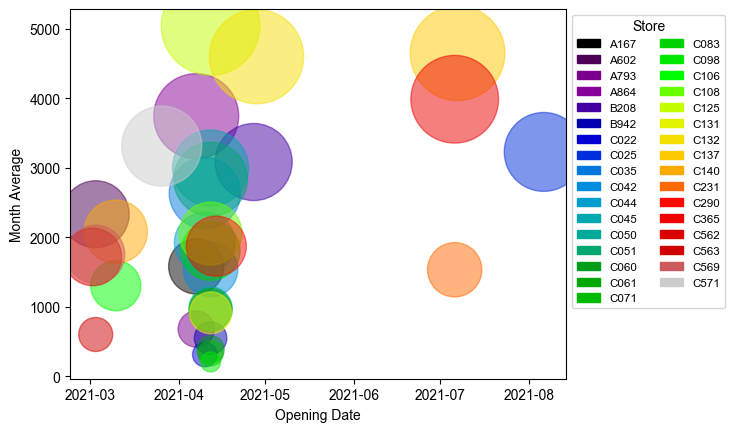

In [263]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

opening_dates = outvar['time']
average_sales = outvar['amount_avr']
store_names = outvar['store_id']

fig, ax = plt.subplots()

# 生成一个颜色映射
colors = plt.cm.nipy_spectral(np.linspace(0, 1, len(store_names)))

# 绘制散点图
scatter = ax.scatter(opening_dates, average_sales, s=average_sales, alpha=0.5, c=colors)

# 创建自定义图例
legend_elements = [Patch(facecolor=colors[i], edgecolor=colors[i], label=store_names[i]) for i in range(len(store_names))]
# 由于店铺过多，这里选择只展示部分店铺作为示例
ax.legend(handles=legend_elements, title='Store', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title_fontsize='medium', ncol=2)

# Set labels and title
ax.set_xlabel('Opening Date')
ax.set_ylabel('Month Average')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

df=pd.read_excel('/Users/lesliedeng/Desktop/毕设/code/回归/did/DID.xlsx',sheet_name='raw_did')

In [1]:
import graphviz
dot = graphviz.Digraph(comment='The Round Table')

# 添加节点
dot.node('A', 'O2O服务区域')
dot.node('B', '线上传统电商销售额')
dot.node('C', '处方药在线销售额')
dot.node('D', '时效性要求高的药品在线销售额')
dot.node('E', '渠道冲突强度')
dot.node('F', '京东和天猫门店')

# 添加关系
dot.edges(['AB', 'AC', 'AD'])  # O2O服务区域对各类销售额的影响
dot.edge('A', 'E', label='影响')  # O2O服务区域对渠道冲突强度的影响
dot.edge('E', 'B', label='导致降低')  # 渠道冲突强度对线上传统电商销售额的影响
dot.edge('E', 'C', label='强化影响')  # 渠道冲突强度对处方药在线销售额的影响
dot.edge('E', 'D', label='特别强化')  # 渠道冲突强度对时效性要求高的药品销售额的特别影响
dot.edge('A', 'F', label='差异化影响')  # O2O服务区域对京东和天猫的不同影响

# 生成图像
dot.render('cause_effect_diagram', format='png', engine='dot')
'cause_effect_diagram.png'

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH